# Importing the Data csv File

In [1]:
import pandas as pd


csv_path = "../data/mech_state_labels.csv"
df = pd.read_csv(csv_path)

In [2]:
print(df.size)
df.head()

60000


,Pressure_1,Pressure_2,input_state,feedback_state,labels
0,72.424683,52.339493,1,1,0
1,70.837145,55.698611,1,1,0
2,64.797545,48.172671,1,1,0
3,60.540895,43.602264,1,1,0
4,46.564752,24.984738,1,1,0


The data was generated in sequence of the labels and therefore is not shuffled or randomized. We'll first shuffle the dataframe.

In [3]:
df = df.sample(frac = 1)
df.head(10)
print(df.shape)

(12000, 5)


# Convert Type Data

Now we'll normalize the two pressure columns using sklearn.

In [4]:
df.dtypes

Pressure_1        float64
Pressure_2        float64
input_state         int64
feedback_state      int64
labels              int64
dtype: object

In [5]:
# Cast states as floats

df['input_state'] = df['input_state'].astype(float)
df['feedback_state'] = df['feedback_state'].astype(float)

In [6]:
df.head(10)

,Pressure_1,Pressure_2,input_state,feedback_state,labels
9101,55.274500,38.847974,0.0,1.0,4
7638,48.476216,66.753385,0.0,0.0,3
2405,64.823564,0.000000,0.0,0.0,1
3777,59.521066,0.000000,0.0,0.0,1
11646,70.948191,55.494828,1.0,0.0,5
3412,69.131474,0.000000,0.0,0.0,1
5437,37.389677,54.381537,1.0,1.0,2
557,62.152700,44.398717,1.0,1.0,0
8548,73.813481,50.435801,0.0,1.0,4
4492,55.586873,72.859618,1.0,1.0,2


In [7]:
df.dtypes

Pressure_1        float64
Pressure_2        float64
input_state       float64
feedback_state    float64
labels              int64
dtype: object

# One Shot Encoding

In [8]:
import tensorflow as tf

indices = len(df['labels'])
depth = pd.Series(df['labels'].values).unique()
print(indices)
print(depth)


12000
[4 3 1 5 2 0]


In [9]:
target_df = pd.get_dummies(df['labels'].values)

#target = preprocessing.LabelBinarizer()
#target.fit(depth)
#target.classes_

In [10]:
#target.transform(df['labels'])

In [11]:
#df['labels'] = target.transform(df['labels'])

In [12]:
df.head(10)

,Pressure_1,Pressure_2,input_state,feedback_state,labels
9101,55.274500,38.847974,0.0,1.0,4
7638,48.476216,66.753385,0.0,0.0,3
2405,64.823564,0.000000,0.0,0.0,1
3777,59.521066,0.000000,0.0,0.0,1
11646,70.948191,55.494828,1.0,0.0,5
3412,69.131474,0.000000,0.0,0.0,1
5437,37.389677,54.381537,1.0,1.0,2
557,62.152700,44.398717,1.0,1.0,0
8548,73.813481,50.435801,0.0,1.0,4
4492,55.586873,72.859618,1.0,1.0,2


In [13]:
target_df.head(10)

,0,1,2,3,4,5
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,0,1
5,0,1,0,0,0,0
6,0,0,1,0,0,0
7,1,0,0,0,0,0
8,0,0,0,0,1,0
9,0,0,1,0,0,0


Lastly we need to drop the labels from the dataframe.

In [14]:
df = df.drop(['labels'],axis=1)
df.head()

,Pressure_1,Pressure_2,input_state,feedback_state
9101,55.274500,38.847974,0.0,1.0
7638,48.476216,66.753385,0.0,0.0
2405,64.823564,0.000000,0.0,0.0
3777,59.521066,0.000000,0.0,0.0
11646,70.948191,55.494828,1.0,0.0


In [15]:
print('Input Dataframe Shape: {}'.format(df.shape))
print('Target Dataframe Shape: {}'.format(target_df.shape))

Input Dataframe Shape: (12000, 4)
Target Dataframe Shape: (12000, 6)


# Split Data into Train and Test

Our input and label dataframes are ready to be split into training and validation data.
To do this we'll use sklearn and the train_test_split function.

In [16]:
from sklearn.model_selection import train_test_split

# We need to pass numpy arrays which can easy be converted from dataframes

X_train, X_test, y_train, y_test = train_test_split(df.to_numpy(), target_df.to_numpy(), test_size=0.2)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9600, 4), (2400, 4), (9600, 6), (2400, 6))

# Generate the Model

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4,activation='relu',
                          input_dim=4),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 30        
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',
             metrics=['accuracy'])

In [21]:
history = model.fit(x=X_train,y=y_train,
                   batch_size=10,
                   epochs=5,
                   verbose=2,
                   validation_data=(X_test,y_test))

Epoch 1/5
960/960 - 1s - loss: 2.5201 - accuracy: 0.3099 - val_loss: 1.4258 - val_accuracy: 0.3358
Epoch 2/5
960/960 - 1s - loss: 1.2671 - accuracy: 0.3647 - val_loss: 1.1337 - val_accuracy: 0.4400
Epoch 3/5
960/960 - 1s - loss: 1.0656 - accuracy: 0.5178 - val_loss: 0.9910 - val_accuracy: 0.5725
Epoch 4/5
960/960 - 1s - loss: 0.9551 - accuracy: 0.5930 - val_loss: 0.9065 - val_accuracy: 0.5958
Epoch 5/5
960/960 - 1s - loss: 0.8836 - accuracy: 0.6108 - val_loss: 0.8459 - val_accuracy: 0.6058


In [23]:
results = model.predict([[55.2, 45.0, 1.0, 1.0]])
results = results[0,:]
print(results)

[0.05326085 0.00285541 0.42968693 0.40180492 0.03200463 0.08038719]


([<matplotlib.axis.XTick at 0x7f8cb03693d0>,
 [Text(0, 0, 'Normal Open'),
  Text(1, 0, 'Normal Close'),
  Text(2, 0, 'Rev Open'),
  Text(3, 0, 'Rev Close'),
  Text(4, 0, 'Stuck Open'),
  Text(5, 0, 'Stuck Close')])

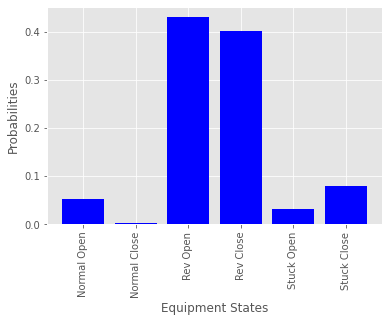

In [24]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

x = ['Normal Open','Normal Close','Rev Open','Rev Close','Stuck Open','Stuck Close']

x_pos = [i for i,_ in enumerate(x)]

plt.bar(x_pos,results,color='blue')
plt.xlabel("Equipment States")
plt.ylabel("Probabilities")

plt.xticks(x_pos,x,rotation='vertical')